In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv('/content/heart.csv', sep=",",  encoding='cp1252')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
y = df['output']
x =df.drop('output', axis = 1)

In [6]:
for column in x.columns:
  null_number = x[column].isnull().sum()
  null_percent = round(null_number / len(x[column]) * 100,3)
  print('column: ', column,'  null is',null_number," from ", len(df[column]),' percent of them is ', null_percent)
  if null_percent >= 0.3:
    x = x.drop(str(column), axis = 1)
    print('deleted column ',column)

column:  age   null is 0  from  303  percent of them is  0.0
column:  sex   null is 0  from  303  percent of them is  0.0
column:  cp   null is 0  from  303  percent of them is  0.0
column:  trtbps   null is 0  from  303  percent of them is  0.0
column:  chol   null is 0  from  303  percent of them is  0.0
column:  fbs   null is 0  from  303  percent of them is  0.0
column:  restecg   null is 0  from  303  percent of them is  0.0
column:  thalachh   null is 0  from  303  percent of them is  0.0
column:  exng   null is 0  from  303  percent of them is  0.0
column:  oldpeak   null is 0  from  303  percent of them is  0.0
column:  slp   null is 0  from  303  percent of them is  0.0
column:  caa   null is 0  from  303  percent of them is  0.0
column:  thall   null is 0  from  303  percent of them is  0.0


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [10]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [11]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [13]:
x_preprocessed = preprocessor.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=22)),
    ('SVC', SVC(probability=True)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=22)),
    ('AdaBoost', AdaBoostClassifier(random_state=22)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=22))
]

Model: Logistic Regression
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



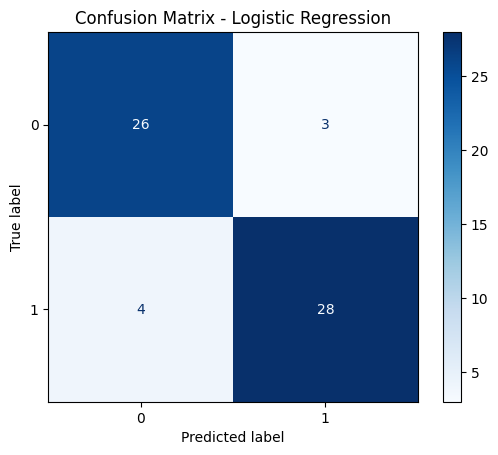

Model: Random Forest
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



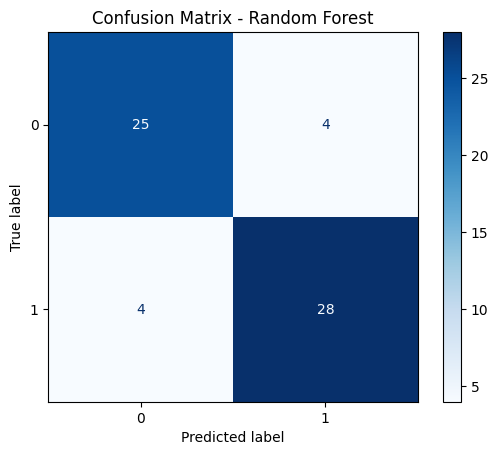

Model: SVC
Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



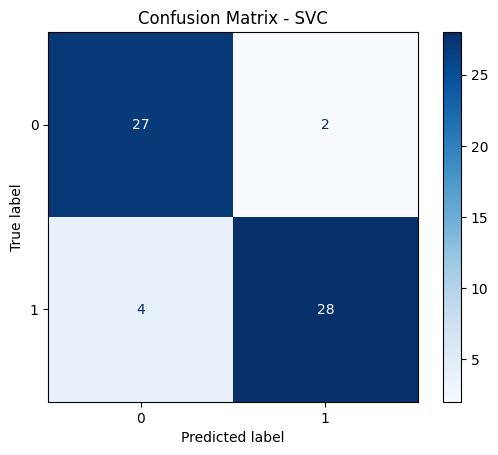

Model: Gradient Boosting
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



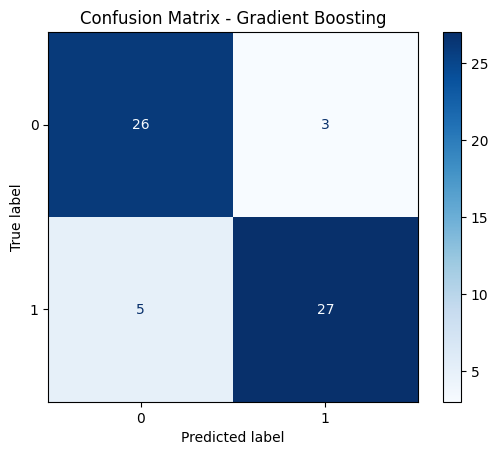

Model: AdaBoost
Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



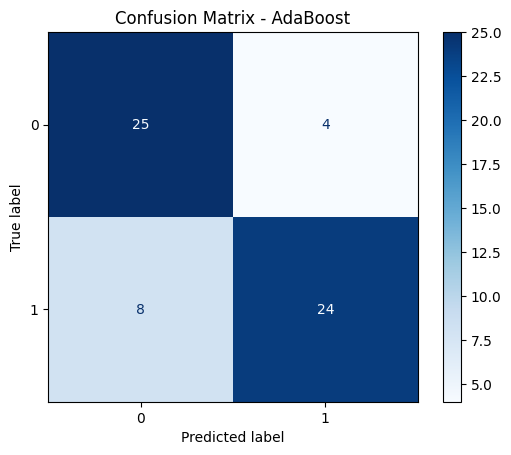

Model: XGBoost
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



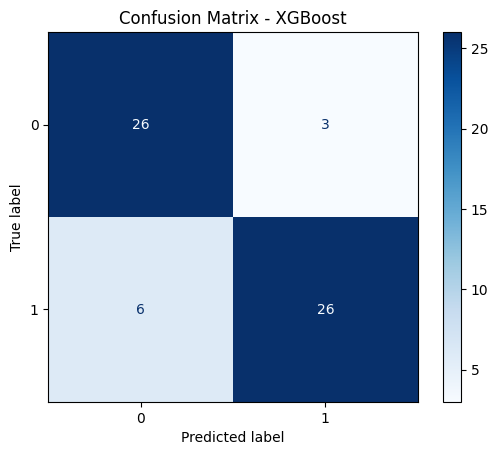

In [16]:
# Функция для обучения модели, вывода результатов и построения графиков
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {acc}')
    print(classification_report(y_test, y_pred))

    # Построение матрицы запутанности
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Визуализация ошибок и точности
for name, model in models:
    evaluate_model(name, model, x_train, y_train, x_test, y_test)

In [17]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [18]:
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [425, 375, 400, 350, 450, 360, 380],
        'classifier__max_depth': [13, 14, 12, 11,10,11,9],
        'classifier__min_samples_split': [3, 5, 2,4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [600,625,650,575,550],
        'classifier__learning_rate': [0.01,0.02,0.03],
        'classifier__max_depth': [4, 5,3],
        'classifier__subsample': [0.7, 0.675, 0.65],
        'classifier__min_samples_split': [2, 5, 3, 4],
        'classifier__min_samples_leaf': [3, 2, 4, 5]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 120, 130, 80,],
        'classifier__learning_rate': [0.001, 0.01, 0.05],
        'classifier__algorithm': ['SAMME', 'SAMME.R']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 75,125,150],
        'classifier__learning_rate': [0.01,0.02,0.03],
        'classifier__max_depth': [3, 5, 6, 4],
        'classifier__subsample': [0.7, 0.725, 0.675],
        'classifier__colsample_bytree': [0.7, 0.8],
        'classifier__gamma': [0.3, 0.5]
    }
}

лучшие модели после первого цикла

Best parameters for Random Forest: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 4, 'classifier__max_depth': 12}

Best parameters for Gradient Boosting: {'classifier__n_estimators': 600, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.01}

Best parameters for AdaBoost: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05}

Best parameters for XGBoost: {'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

In [19]:
def parameterize_model(name, model, X_train, y_train, search_method='grid'):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    if name in param_grids:
        if search_method == 'grid':
            search = GridSearchCV(pipe, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        elif search_method == 'random':
            search = RandomizedSearchCV(pipe, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, n_iter=10)

        search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {search.best_params_}")
        return search.best_estimator_
    else:
        return pipe.fit(X_train, y_train)

In [20]:
def find_best_estimators(X_train, y_train, search_method='grid'):
    best_estimators = {}
    for name, model in models.items():
        print(f"Parameterizing {name}...")
        best_estimators[name] = parameterize_model(name, model, X_train, y_train, search_method)
    return best_estimators

In [21]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {acc}')
    print(classification_report(y_test, y_pred))

    # Построение матрицы запутанности
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [ ]:
best_estimators = find_best_estimators(x_train, y_train, search_method='grid')

# Оценка каждой модели
for name, model in best_estimators.items():
    evaluate_model(name, model, x_test, y_test)

Parameterizing Logistic Regression...
Parameterizing Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 13, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 350}
Parameterizing SVC...
Parameterizing Gradient Boosting...
